In [1]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
import ipywidgets
import geocoder
import geopy

In [2]:
df = pd.read_csv("Metro_Nashville_Police_Department_Calls_for_Service__2019_.csv", index_col='Event Number')

In [3]:
df.head()

Call Received  Complaint Number Shift  Tencode  \
Event Number                                                              
PD201900158507  02/20/2019 10:44:46 AM       20190138459     A       50   
PD201900135069  02/13/2019 01:10:45 AM       20190117840     C       71   
PD201900149088  02/17/2019 12:47:28 PM       20190130236     A       50   
PD201900148900  02/17/2019 10:46:09 AM       20190129933     A       45   
PD201900148353  02/17/2019 04:31:56 AM       20190129434     C       43   

                                        Tencode Description Tencode Suffix  \
Event Number                                                                 
PD201900158507                                        Theft              R   
PD201900135069                     Burglary - Non-Residence              A   
PD201900149088                                        Theft              R   
PD201900148900           Vehicle Accident - Property Damage              P   
PD201900148353  Want Officer for Investigation / Assistance              P   

               Tencode Suffix Description  Disposition Code  \
Event Number                                                  
PD201900158507                     REPORT                 1   
PD201900135069                      ALARM                 6   
PD201900149088                     REPORT                 1   
PD201900148900                   PROGRESS                 6   
PD201900148353                   PROGRESS                 8   

               Disposition Description   Block     Street Name  \
Event Number                                                     
PD201900158507   M.P.D. REPORT COMPLED     NaN  E CAMPBELL RD    
PD201900135069     ASSISTED OTHER UNIT     NaN  CHARLOTTE PKE    
PD201900149088   M.P.D. REPORT COMPLED     NaN      CHAPEL AV    
PD201900148900     ASSISTED OTHER UNIT  1200.0       2ND AV N    
PD201900148353   ADVISED IN CIVIL CASE   100.0       N 1ST ST    

               Unit Dispatched Sector Zone     RPA  Latitude  Longitude  \
Event Number                                                              
PD201900158507            MAPR    NaN  NaN     NaN       NaN        NaN   
PD201900135069            123C    NaN  NaN     NaN       NaN        NaN   
PD201900149088            213B    NaN  NaN     NaN       NaN        NaN   
PD201900148900            410A      C   13  4315.0    36.178    -86.785   
PD201900148353            415C      C   13  1993.0    36.172    -86.772   

                  Mapped Location  
Event Number                       
PD201900158507                NaN  
PD201900135069                NaN  
PD201900149088                NaN  
PD201900148900  (36.178, -86.785)  
PD201900148353  (36.172, -86.772)

In [4]:
df.shape

(785035, 18)

In [5]:
df.count()

Call Received                 785035
Complaint Number              785035
Shift                         754497
Tencode                       785035
Tencode Description           785035
Tencode Suffix                567571
Tencode Suffix Description    546827
Disposition Code              785035
Disposition Description       783773
Block                         760586
Street Name                   785029
Unit Dispatched               736217
Sector                        752994
Zone                          759604
RPA                           759725
Latitude                      757275
Longitude                     757275
Mapped Location               754258
dtype: int64

In [6]:
df_new = df[['Call Received', 'Tencode Description','Disposition Description','Mapped Location','Latitude','Longitude']]
df_new = df_new.sort_values(by='Call Received')
df_new.head(5)

Call Received Tencode Description  \
Event Number                                                 
PD201900037508  01/13/2019 03:28:00 PM                  50   
PD201900044710  01/15/2019 08:04:00 PM                  70   
PD201900051874  01/17/2019 11:23:00 PM                  44   
PD201900053991  01/18/2019 02:50:01 PM               Theft   
PD201900054328  01/18/2019 04:59:00 PM                  50   

               Disposition Description    Mapped Location  Latitude  Longitude  
Event Number                                                                    
PD201900037508   M.P.D. REPORT COMPLED                NaN       NaN        NaN  
PD201900044710    DISREGARD / SIGNAL 9  (36.151, -86.759)    36.151    -86.759  
PD201900051874     ASSISTED OTHER UNIT   (36.14, -86.821)    36.140    -86.821  
PD201900053991   M.P.D. REPORT COMPLED                NaN       NaN        NaN  
PD201900054328   M.P.D. REPORT COMPLED                NaN       NaN        NaN

In [7]:
df_new.shape

(785035, 6)

In [8]:
df_new.isna().sum()

Call Received                  0
Tencode Description            0
Disposition Description     1262
Mapped Location            30777
Latitude                   27760
Longitude                  27760
dtype: int64

In [9]:
df_new['Call Received'] =  pd.to_datetime(df_new['Call Received'])

In [10]:
df_new['Call Time'] = [d.time() for d in df_new['Call Received']]

In [11]:
df_new['Call Day'] = df_new['Call Received'].dt.day_name()

In [12]:
df_new['Call Month'] = pd.DatetimeIndex(df_new['Call Received']).month

In [13]:
df_new['Call Month'] = df_new['Call Month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
df_new = df_new.assign(
    timeOfDay=pd.cut(
        df_new['Call Received'].dt.hour,
        [-1, 4, 8, 12, 16, 20, 24],
        labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']))

In [15]:
df_new.rename(columns = {'timeOfDay':'Call Time of Day'}, inplace = True)

In [16]:
df_new.head(3)

Call Received Tencode Description  \
Event Number                                             
PD201900037508 2019-01-13 15:28:00                  50   
PD201900044710 2019-01-15 20:04:00                  70   
PD201900051874 2019-01-17 23:23:00                  44   

               Disposition Description    Mapped Location  Latitude  \
Event Number                                                          
PD201900037508   M.P.D. REPORT COMPLED                NaN       NaN   
PD201900044710    DISREGARD / SIGNAL 9  (36.151, -86.759)    36.151   
PD201900051874     ASSISTED OTHER UNIT   (36.14, -86.821)    36.140   

                Longitude Call Time  Call Day Call Month Call Time of Day  
Event Number                                                               
PD201900037508        NaN  15:28:00    Sunday        Jan        Afternoon  
PD201900044710    -86.759  20:04:00   Tuesday        Jan          Evening  
PD201900051874    -86.821  23:23:00  Thursday        Jan            Night

In [17]:
df_new['Call Week'] = df_new['Call Received'].dt.week

In [18]:
#Should only be 51 weeks for call week since dataframe is missing data from jan 1-12
df_new.apply(lambda x: len(x.unique()))

Call Received              763745
Tencode Description            92
Disposition Description        16
Mapped Location             40118
Latitude                      436
Longitude                     529
Call Time                   86371
Call Day                        7
Call Month                     12
Call Time of Day                6
Call Week                      52
dtype: int64

In [19]:
test1 = df_new[(df_new['Call Week'] == 1)]
test1.shape

(4337, 11)

In [21]:
test1.head(3)

Call Received  \
Event Number                         
PD201901087229 2019-12-30 01:00:34   
PD201901088602 2019-12-30 13:00:50   
PD201901088603 2019-12-30 13:00:54   

                                        Tencode Description  \
Event Number                                                  
PD201901087229  Want Officer for Investigation / Assistance   
PD201901088602                              Suicidal Person   
PD201901088603                               Business Check   

               Disposition Description    Mapped Location  Latitude  \
Event Number                                                          
PD201901087229        ASSISTED CITIZEN  (36.144, -86.744)    36.144   
PD201901088602   M.P.D. REPORT COMPLED  (36.257, -86.674)    36.257   
PD201901088603      COMMUNITY POLICING  (36.162, -86.789)    36.162   

                Longitude Call Time Call Day Call Month Call Time of Day  \
Event Number                                                               
PD201901087229    -86.744  01:00:34   Monday        Dec       Late Night   
PD201901088602    -86.674  13:00:50   Monday        Dec        Afternoon   
PD201901088603    -86.789  13:00:54   Monday        Dec        Afternoon   

                Call Week  
Event Number               
PD201901087229          1  
PD201901088602          1  
PD201901088603          1

In [22]:
test1.tail(3)

Call Received                Tencode Description  \
Event Number                                                            
PD201901091277 2019-12-31 12:58:53  Administrative/Special Assignment   
PD201901090050 2019-12-31 00:59:34               Burglary - Residence   
PD201901090051 2019-12-31 00:59:58                     Business Check   

                 Disposition Description    Mapped Location  Latitude  \
Event Number                                                            
PD201901091277          ASSISTED CITIZEN   (36.166, -86.78)    36.166   
PD201901090050      DISREGARD / SIGNAL 9  (36.319, -86.728)    36.319   
PD201901090051  LOCATION/BUILDING SECURE   (36.25, -86.714)    36.250   

                Longitude Call Time Call Day Call Month Call Time of Day  \
Event Number                                                               
PD201901091277    -86.780  12:58:53  Tuesday        Dec          Morning   
PD201901090050    -86.728  00:59:34  Tuesday        Dec       Late Night   
PD201901090051    -86.714  00:59:58  Tuesday        Dec       Late Night   

                Call Week  
Event Number               
PD201901091277          1  
PD201901090050          1  
PD201901090051          1

In [23]:
df_new['Call Week'].value_counts()

5     18667
12    18520
16    18201
7     17997
13    17978
10    17977
21    17970
8     17848
17    17834
6     17677
15    17571
11    17406
34    17405
32    17382
14    17378
20    17279
9     17238
26    17224
24    17193
19    16997
25    16987
33    16952
18    16768
23    16638
30    16401
29    16264
31    16087
37    16055
38    15901
47    15861
39    15744
42    15657
44    15580
45    15580
49    15542
40    15447
46    15193
43    14972
41    14680
51    14623
4     14511
48    13743
28    13516
50    13132
36    13017
22    12295
52    11891
35     9746
27     8148
1      4337
3        24
2         1
Name: Call Week, dtype: int64

In [24]:
#December 30 and 31 are being counted as week 1, need to change them to week 52
df_new.loc[df_new['Call Week'] == 1, "Call Week"] = 52

In [25]:
df_new = df_new[['Call Received', 'Call Month', 'Call Week', 'Call Day', 'Call Time', 'Call Time of Day', 'Tencode Description','Disposition Description','Mapped Location','Latitude','Longitude']]

In [26]:
df_new['Tencode Description'].unique()

array(['50', '70', '44', 'Theft', '43', '63', 'Holdup / Robbery', '96',
       '71', '87', '54', '45',
       'Want Officer for Investigation / Assistance', '57', '3', '51',
       '93', '15', '49', '42', '88', '92', '83', '40', '53', '75', '61',
       '46', '95', '65', '64', '59', '16', '35', '94', '52', '62',
       'Disorderly Person', '85', 'Missing Person', '58', '14', '66',
       '73', '8000', 'Vehicle Accident - Property Damage',
       'Vehicle Accident - Personal Injury', 'Fight / Assault',
       'Administrative/Special Assignment', 'Community Policing Activity',
       'Vehicle Blocking Right of Way', 'Traffic Violation',
       'Safety Hazard', 'Meal Break', 'Business Check',
       'Burglary - Residence', 'Investigate 911 Hang-Up Call',
       'Burglary - Non-Residence', 'Fixed Post', 'Corpse / D. O. A.',
       'Suspicious Person', 'Person Indecently Exposed',
       'Suicidal Person', 'Transport Prisoner / Suspect',
       'Person with Weapon', 'Dangerous / Injured Ani

In [27]:
td_replacements = {
    '3': 'Administrative/Special Assignment',
    '50': 'Theft',
    '57': 'Fight / Assault',
    '53': 'Holdup / Robbery',
    '44': 'Disorderly Person',
    '64': 'Corpse / D. O. A.',
    '54': 'Person with Weapon',
    '70': 'Burglary - Residence',
    '96': 'Business Check',
    '43': 'Want Officer for Investigation / Assistance',
    '95': 'Meal Break',
    '83': 'Shots Fired',
    '92': 'Fixed Post',
    '40': 'Suspicious Person',
    '93': 'Traffic Violation',
    '15': 'Community Policing Activity',
    '71': 'Burglary - Non-Residence',
    '88': 'Investigate 911 Hang-Up Call',
    '58': 'Prowler',
    '49': 'Vehicle Blocking Right of Way',
    '87': 'Safety Hazard',
    '75': 'Missing Person',
    '62': 'Person Screaming',
    '16': 'Transport Prisoner / Suspect',
    '45': 'Vehicle Accident - Property Damage',
    '42': 'Intoxicated Person',
    '73': 'Hazardous Liquid / Gas Leak',
    '46': 'Vehicle Accident - Personal Injury',
    '59': 'Person Indecently Exposed',
    '63': 'Suicidal Person',
    '65': 'Dangerous / Injured Animal',
    '35': 'Mentally ILL Person',
    '52': 'Shooting',
    '61': 'Fire',
    '51': 'Cutting / Stabbing',
    '14': 'Escort / Convoy',
    '8000': 'Explosion',
    '94': 'Personal Relief',
    '66': 'Bomb Threat',
    '85': 'Prisoner Escapee'
}

In [28]:
df_new['Tencode Description'] = df_new['Tencode Description'].map(td_replacements).fillna(df_new['Tencode Description'])

In [29]:
df_new['Tencode Description'].unique()

array(['Theft', 'Burglary - Residence', 'Disorderly Person',
       'Want Officer for Investigation / Assistance', 'Suicidal Person',
       'Holdup / Robbery', 'Business Check', 'Burglary - Non-Residence',
       'Safety Hazard', 'Person with Weapon',
       'Vehicle Accident - Property Damage', 'Fight / Assault',
       'Administrative/Special Assignment', 'Cutting / Stabbing',
       'Traffic Violation', 'Community Policing Activity',
       'Vehicle Blocking Right of Way', 'Intoxicated Person',
       'Investigate 911 Hang-Up Call', 'Fixed Post', 'Shots Fired',
       'Suspicious Person', 'Missing Person', 'Fire',
       'Vehicle Accident - Personal Injury', 'Meal Break',
       'Dangerous / Injured Animal', 'Corpse / D. O. A.',
       'Person Indecently Exposed', 'Transport Prisoner / Suspect',
       'Mentally ILL Person', 'Personal Relief', 'Shooting',
       'Person Screaming', 'Prisoner Escapee', 'Prowler',
       'Escort / Convoy', 'Bomb Threat', 'Hazardous Liquid / Gas Leak'

In [30]:
df_new.head()

Call Received Call Month  Call Week  Call Day Call Time  \
Event Number                                                                   
PD201900037508 2019-01-13 15:28:00        Jan          2    Sunday  15:28:00   
PD201900044710 2019-01-15 20:04:00        Jan          3   Tuesday  20:04:00   
PD201900051874 2019-01-17 23:23:00        Jan          3  Thursday  23:23:00   
PD201900053991 2019-01-18 14:50:01        Jan          3    Friday  14:50:01   
PD201900054328 2019-01-18 16:59:00        Jan          3    Friday  16:59:00   

               Call Time of Day   Tencode Description Disposition Description  \
Event Number                                                                    
PD201900037508        Afternoon                 Theft   M.P.D. REPORT COMPLED   
PD201900044710          Evening  Burglary - Residence    DISREGARD / SIGNAL 9   
PD201900051874            Night     Disorderly Person     ASSISTED OTHER UNIT   
PD201900053991        Afternoon                 Theft   M.P.D. REPORT COMPLED   
PD201900054328        Afternoon                 Theft   M.P.D. REPORT COMPLED   

                  Mapped Location  Latitude  Longitude  
Event Number                                            
PD201900037508                NaN       NaN        NaN  
PD201900044710  (36.151, -86.759)    36.151    -86.759  
PD201900051874   (36.14, -86.821)    36.140    -86.821  
PD201900053991                NaN       NaN        NaN  
PD201900054328                NaN       NaN        NaN

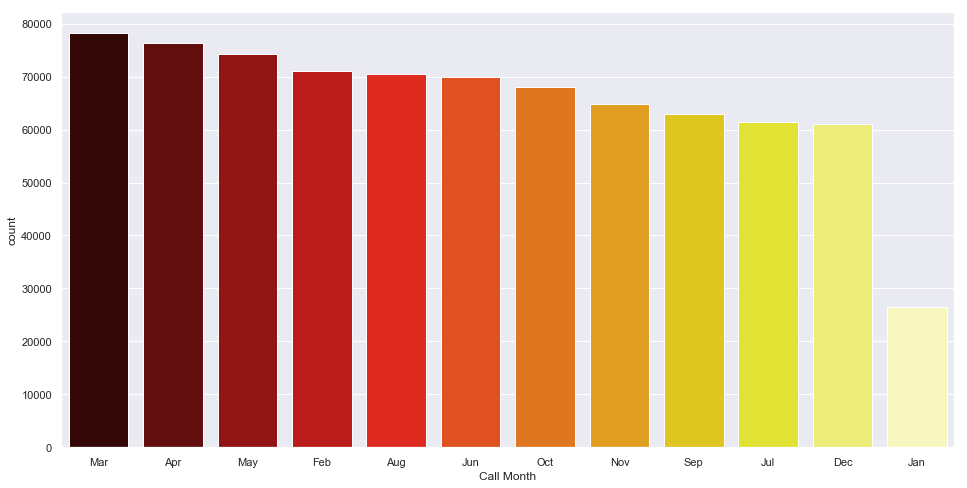

In [31]:
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Call Month", data=df_new, palette='hot', order = df_new['Call Month'].value_counts().index)

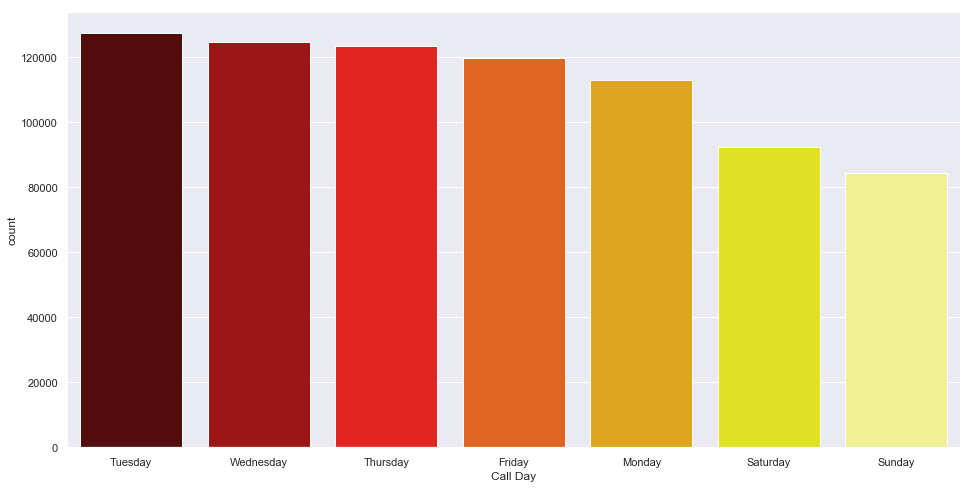

In [32]:
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Call Day", data=df_new, palette='hot', order = df_new['Call Day'].value_counts().index)

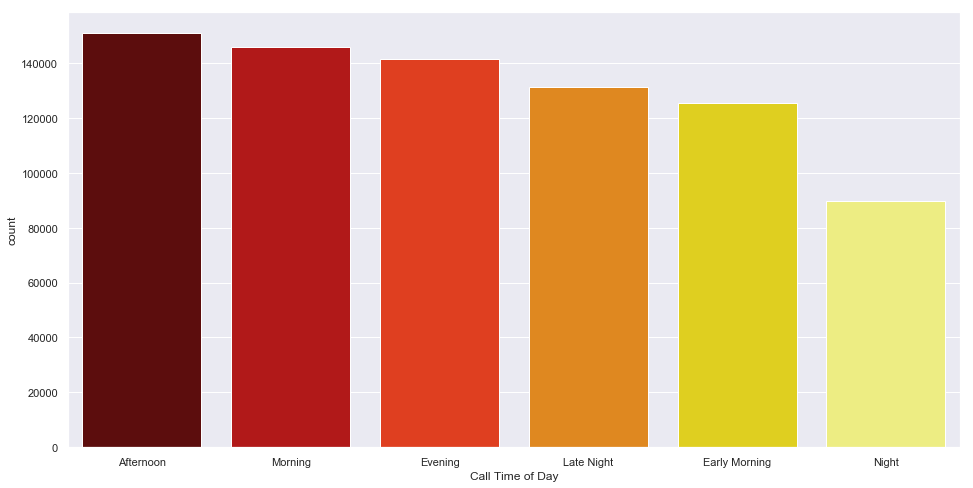

In [33]:
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="Call Time of Day", data=df_new, palette='hot', order = df_new['Call Time of Day'].value_counts().index)

In [34]:
df_new['Tencode Description'].value_counts()

Want Officer for Investigation / Assistance    173126
Business Check                                 147235
Community Policing Activity                     60608
Administrative/Special Assignment               53418
Traffic Violation                               43541
Vehicle Accident - Property Damage              39224
Disorderly Person                               39038
Theft                                           37715
Safety Hazard                                   32105
Suspicious Person                               25206
Burglary - Residence                            24606
Burglary - Non-Residence                        22319
Investigate 911 Hang-Up Call                    15670
Vehicle Accident - Personal Injury              10640
Vehicle Blocking Right of Way                    8797
Fight / Assault                                  8308
Shots Fired                                      6616
Fixed Post                                       5225
Holdup / Robbery            

In [36]:
(df_new['Tencode Description'] == 'Theft').value_counts(normalize=True)

False    0.951958
True     0.048042
Name: Tencode Description, dtype: float64

In [37]:
df_time = df_new.groupby('Call Day')['Call Time of Day'].value_counts(normalize=True).to_frame()
df_time

Call Time of Day
Call Day  Call Time of Day                  
Friday    Afternoon                 0.190080
          Morning                   0.190039
          Evening                   0.188595
          Late Night                0.159307
          Early Morning             0.154893
          Night                     0.117086
Monday    Afternoon                 0.202649
          Morning                   0.194286
          Evening                   0.175320
          Early Morning             0.170200
          Late Night                0.149471
          Night                     0.108075
Saturday  Evening                   0.201953
          Late Night                0.190285
          Afternoon                 0.177763
          Morning                   0.161424
          Night                     0.136034
          Early Morning             0.132541
Sunday    Late Night                0.200709
          Afternoon                 0.179831
          Evening                   0.178739
          Morning                   0.164088
          Early Morning             0.149734
          Night                     0.126898
Thursday  Afternoon                 0.196653
          Morning                   0.189522
          Evening                   0.175089
          Late Night                0.164862
          Early Morning             0.164465
          Night                     0.109408
Tuesday   Afternoon                 0.199477
          Morning                   0.193943
          Evening                   0.175825
          Early Morning             0.168077
          Late Night                0.156789
          Night                     0.105889
Wednesday Morning                   0.193491
          Afternoon                 0.192489
          Evening                   0.171839
          Early Morning             0.170139
          Late Night                0.165602
          Night                     0.106441

In [38]:
df_time.unstack()

Call Time of Day                                     \
Call Time of Day        Afternoon Early Morning   Evening Late Night   
Call Day                                                               
Friday                   0.190080      0.154893  0.188595   0.159307   
Monday                   0.202649      0.170200  0.175320   0.149471   
Saturday                 0.177763      0.132541  0.201953   0.190285   
Sunday                   0.179831      0.149734  0.178739   0.200709   
Thursday                 0.196653      0.164465  0.175089   0.164862   
Tuesday                  0.199477      0.168077  0.175825   0.156789   
Wednesday                0.192489      0.170139  0.171839   0.165602   

                                      
Call Time of Day   Morning     Night  
Call Day                              
Friday            0.190039  0.117086  
Monday            0.194286  0.108075  
Saturday          0.161424  0.136034  
Sunday            0.164088  0.126898  
Thursday          0.189522  0.109408  
Tuesday           0.193943  0.105889  
Wednesday         0.193491  0.106441

In [39]:
df_theft_calls = df_new[df_new['Tencode Description'] == 'Theft']

In [40]:
df_theft_calls.shape

(37715, 11)

In [41]:
df_theft_calls.head(10)

Call Received Call Month  Call Week  Call Day Call Time  \
Event Number                                                                   
PD201900037508 2019-01-13 15:28:00        Jan          2    Sunday  15:28:00   
PD201900053991 2019-01-18 14:50:01        Jan          3    Friday  14:50:01   
PD201900054328 2019-01-18 16:59:00        Jan          3    Friday  16:59:00   
PD201900054442 2019-01-18 17:37:00        Jan          3    Friday  17:37:00   
PD201900052786 2019-01-18 07:12:00        Jan          3    Friday  07:12:00   
PD201900055448 2019-01-19 01:13:00        Jan          3  Saturday  01:13:00   
PD201900058665 2019-01-20 09:40:00        Jan          3    Sunday  09:40:00   
PD201900058716 2019-01-20 10:19:00        Jan          3    Sunday  10:19:00   
PD201900058856 2019-01-20 11:58:00        Jan          3    Sunday  11:58:00   
PD201900058859 2019-01-20 11:59:00        Jan          3    Sunday  11:59:00   

               Call Time of Day Tencode Description Disposition Description  \
Event Number                                                                  
PD201900037508        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900053991        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900054328        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900054442          Evening               Theft    DISREGARD / SIGNAL 9   
PD201900052786    Early Morning               Theft    DISREGARD / SIGNAL 9   
PD201900055448       Late Night               Theft   M.P.D. REPORT COMPLED   
PD201900058665          Morning               Theft     ASSISTED OTHER UNIT   
PD201900058716          Morning               Theft   M.P.D. REPORT COMPLED   
PD201900058856          Morning               Theft   M.P.D. REPORT COMPLED   
PD201900058859          Morning               Theft    DISREGARD / SIGNAL 9   

                  Mapped Location  Latitude  Longitude  
Event Number                                            
PD201900037508                NaN       NaN        NaN  
PD201900053991                NaN       NaN        NaN  
PD201900054328                NaN       NaN        NaN  
PD201900054442                NaN       NaN        NaN  
PD201900052786                NaN       NaN        NaN  
PD201900055448                NaN       NaN        NaN  
PD201900058665  (36.219, -86.804)    36.219    -86.804  
PD201900058716                NaN       NaN        NaN  
PD201900058856                NaN       NaN        NaN  
PD201900058859                NaN       NaN        NaN

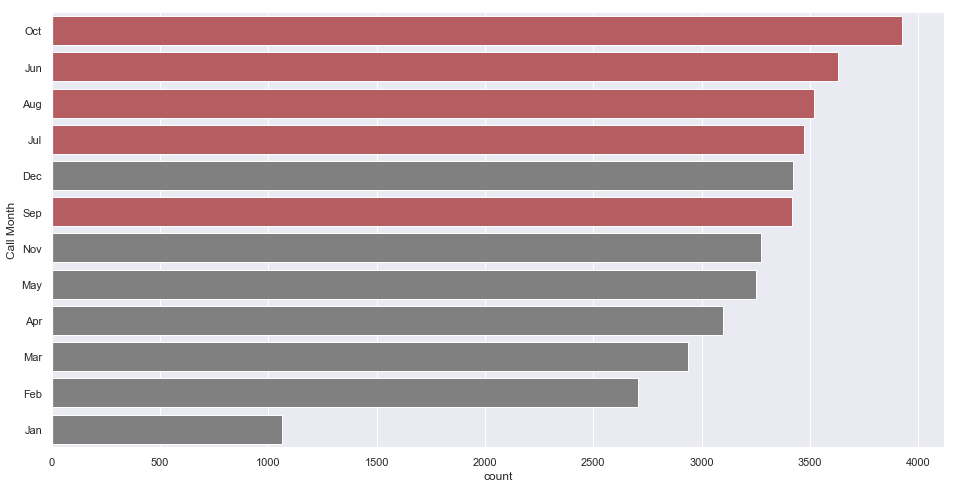

In [42]:
pal = {month: "r" if ((month == "Oct") or
                     (month == "Jun") or
                     (month == "Aug") or
                     (month == "Jul") or
                     (month == "Sep"))  else "grey" for month in df_theft_calls['Call Month'].unique()}


plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
ax = sns.countplot(y="Call Month", data=df_theft_calls, 
                   palette=pal, 
                   order = df_theft_calls['Call Month'].value_counts().index)

In [43]:
df_theft_calls['Call Month'].value_counts(normalize=True)

Oct    0.104043
Jun    0.096195
Aug    0.093252
Jul    0.092112
Dec    0.090733
Sep    0.090601
Nov    0.086756
May    0.086252
Apr    0.082116
Mar    0.077900
Feb    0.071802
Jan    0.028238
Name: Call Month, dtype: float64

In [44]:
top_theft_calls = df_theft_calls[(df_theft_calls['Call Month'] == 'Jun') | 
                                (df_theft_calls['Call Month'] == 'Jul') |
                                (df_theft_calls['Call Month'] == 'Aug') |
                                (df_theft_calls['Call Month'] == 'Sep') |
                                (df_theft_calls['Call Month'] == 'Oct')]

In [45]:
top_theft_calls['Call Day'].value_counts(normalize=True)

Tuesday      0.160468
Monday       0.156292
Wednesday    0.151893
Thursday     0.143764
Friday       0.136414
Saturday     0.125780
Sunday       0.125390
Name: Call Day, dtype: float64

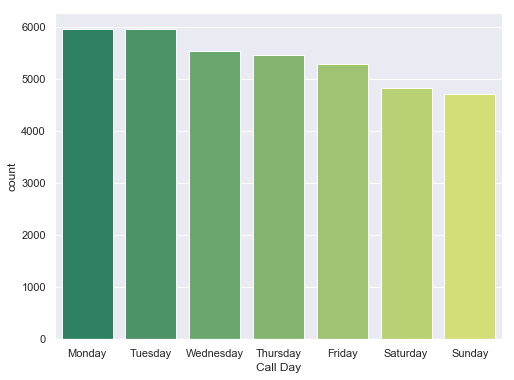

In [46]:
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="Call Day", data=df_theft_calls, 
                   palette='summer', order = df_theft_calls['Call Day'].value_counts().index)

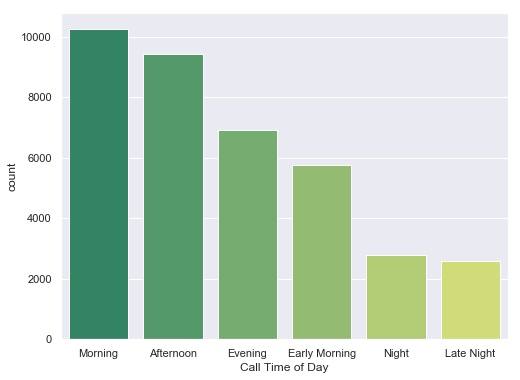

In [48]:
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="Call Time of Day", data=df_theft_calls, 
                   palette='summer', order = df_theft_calls['Call Time of Day'].value_counts().index)

In [49]:
df_theft_calls['Call Time of Day'].value_counts(normalize=True)

Morning          0.272067
Afternoon        0.250007
Evening          0.183110
Early Morning    0.152910
Night            0.073790
Late Night       0.068116
Name: Call Time of Day, dtype: float64

In [50]:
df_theft_calls['Disposition Description'].value_counts()

M.P.D. REPORT COMPLED            24038
DISREGARD / SIGNAL 9              4686
ASSISTED OTHER UNIT               2728
ASSISTED CITIZEN                  2340
GONE ON ARRIVAL                   1991
NO RESPONSE                        842
ASSISTANCE REFUSED                 357
ARREST, CUSTODIAL OR CITATION      213
CITATION - TRAFFIC                 186
ADVISED IN CIVIL CASE              147
SUBJECT WARNED                      51
COMMUNITY POLICING                  37
ADVISORY / NOTICE FORM GIVEN        27
FALSE CALL                          24
LOCATION/BUILDING SECURE            10
Name: Disposition Description, dtype: int64

In [51]:
def generateBaseMap(default_location=[36.16863, -86.7850], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [52]:
theft = df_theft_calls.sample(10000)
theft = theft.dropna()

In [53]:
basemap = generateBaseMap()

In [54]:
theft.apply(lambda row: folium.Circle(location=[row['Latitude'], row['Longitude']],
                                         popup=('Day: {}, Month: {}, Time: {}'.format(row['Call Day'], 
                                                row['Call Month'], row['Call Time of Day'])),
                                    radius=100, color='Blue', fill_color='Blue').add_to(basemap), axis=1)

basemap

In [56]:
map_heatmap = folium.Map([36.16863, -86.7850], zoom_start=11)

theft_heat = theft[['Latitude', 'Longitude']]
theft_heat = [[row['Latitude'],row['Longitude']] for index, row in theft_heat.iterrows()]

HeatMap(theft_heat, min_opacity=0.2).add_to(map_heatmap)

map_heatmap

In [57]:
theft_business = df_theft_calls[(df_theft_calls['Call Time of Day'] == 'Morning') |
                               (df_theft_calls['Call Time of Day'] == 'Afternoon')]

In [58]:
theft_business.head()

Call Received Call Month  Call Week Call Day Call Time  \
Event Number                                                                  
PD201900037508 2019-01-13 15:28:00        Jan          2   Sunday  15:28:00   
PD201900053991 2019-01-18 14:50:01        Jan          3   Friday  14:50:01   
PD201900054328 2019-01-18 16:59:00        Jan          3   Friday  16:59:00   
PD201900058665 2019-01-20 09:40:00        Jan          3   Sunday  09:40:00   
PD201900058716 2019-01-20 10:19:00        Jan          3   Sunday  10:19:00   

               Call Time of Day Tencode Description Disposition Description  \
Event Number                                                                  
PD201900037508        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900053991        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900054328        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900058665          Morning               Theft     ASSISTED OTHER UNIT   
PD201900058716          Morning               Theft   M.P.D. REPORT COMPLED   

                  Mapped Location  Latitude  Longitude  
Event Number                                            
PD201900037508                NaN       NaN        NaN  
PD201900053991                NaN       NaN        NaN  
PD201900054328                NaN       NaN        NaN  
PD201900058665  (36.219, -86.804)    36.219    -86.804  
PD201900058716                NaN       NaN        NaN

In [59]:
theft_business.shape

(19690, 11)

In [60]:
map_heatmap = folium.Map([36.16863, -86.7850], zoom_start=11)

theft_heat_business = theft_business[['Latitude', 'Longitude']].sample(5000).dropna()
theft_heat_business = [[row['Latitude'],row['Longitude']] for index, row in theft_heat_business.iterrows()]

HeatMap(theft_heat_business, min_opacity=0.2).add_to(map_heatmap)

map_heatmap

In [61]:
theft_business['Disposition Description'].value_counts()

M.P.D. REPORT COMPLED            13355
DISREGARD / SIGNAL 9              2264
ASSISTED CITIZEN                  1258
ASSISTED OTHER UNIT                979
GONE ON ARRIVAL                    921
NO RESPONSE                        377
ASSISTANCE REFUSED                 149
CITATION - TRAFFIC                 105
ARREST, CUSTODIAL OR CITATION      101
ADVISED IN CIVIL CASE               91
SUBJECT WARNED                      26
COMMUNITY POLICING                  17
FALSE CALL                          16
ADVISORY / NOTICE FORM GIVEN         9
LOCATION/BUILDING SECURE             6
Name: Disposition Description, dtype: int64

In [62]:
theft_non_business = df_theft_calls[~((df_theft_calls['Call Time of Day'] == 'Morning') |
                               (df_theft_calls['Call Time of Day'] == 'Afternoon'))]

In [63]:
theft_non_business.shape

(18025, 11)

In [64]:
theft_non_business['Disposition Description'].value_counts()

M.P.D. REPORT COMPLED            10683
DISREGARD / SIGNAL 9              2422
ASSISTED OTHER UNIT               1749
ASSISTED CITIZEN                  1082
GONE ON ARRIVAL                   1070
NO RESPONSE                        465
ASSISTANCE REFUSED                 208
ARREST, CUSTODIAL OR CITATION      112
CITATION - TRAFFIC                  81
ADVISED IN CIVIL CASE               56
SUBJECT WARNED                      25
COMMUNITY POLICING                  20
ADVISORY / NOTICE FORM GIVEN        18
FALSE CALL                           8
LOCATION/BUILDING SECURE             4
Name: Disposition Description, dtype: int64

In [65]:
map_heatmap = folium.Map([36.16863, -86.7850], zoom_start=11)

theft_heat_non = theft_non_business[['Latitude', 'Longitude']].sample(5000).dropna()
theft_heat_non = [[row['Latitude'],row['Longitude']] for index, row in theft_heat_non.iterrows()]

HeatMap(theft_heat_non, min_opacity=0.2).add_to(map_heatmap)

map_heatmap

In [66]:
theft_calls_weekend = df_theft_calls[(df_theft_calls['Call Day'] == 'Saturday') |
                               (df_theft_calls['Call Day'] == 'Sunday')]
theft_calls_weekend.shape

(9527, 11)

In [67]:
theft_calls_week = df_theft_calls[~((df_theft_calls['Call Day'] == 'Saturday') |
                               (df_theft_calls['Call Day'] == 'Sunday'))]
theft_calls_week.shape

(28188, 11)

In [68]:
theft_calls_weekend['Call Time of Day'].value_counts()

Morning          2423
Afternoon        2291
Evening          1803
Early Morning    1200
Late Night        952
Night             858
Name: Call Time of Day, dtype: int64

In [69]:
theft_calls_week['Call Time of Day'].value_counts()

Morning          7838
Afternoon        7138
Evening          5103
Early Morning    4567
Night            1925
Late Night       1617
Name: Call Time of Day, dtype: int64

In [74]:
#heatmap for weekend theft calls
map_heatmap = folium.Map([36.16863, -86.7850], zoom_start=15)

theft_heat_weekend = theft_calls_weekend[['Latitude', 'Longitude']].sample(5000).dropna()
theft_heat_weekend = [[row['Latitude'],row['Longitude']] for index, row in theft_heat_weekend.iterrows()]

HeatMap(theft_heat_weekend, min_opacity=0.2).add_to(map_heatmap)

map_heatmap

In [75]:
#heatmap for weekday theft calls
map_heatmap = folium.Map([36.16863, -86.7850], zoom_start=15)

theft_heat_weekday = theft_calls_week[['Latitude', 'Longitude']].sample(5000).dropna()
theft_heat_weekday = [[row['Latitude'],row['Longitude']] for index, row in theft_heat_weekday.iterrows()]

HeatMap(theft_heat_weekday, min_opacity=0.2).add_to(map_heatmap)

map_heatmap

In [76]:
theft_calls_week['Call Day'].value_counts()

Monday       5960
Tuesday      5956
Wednesday    5524
Thursday     5463
Friday       5285
Name: Call Day, dtype: int64

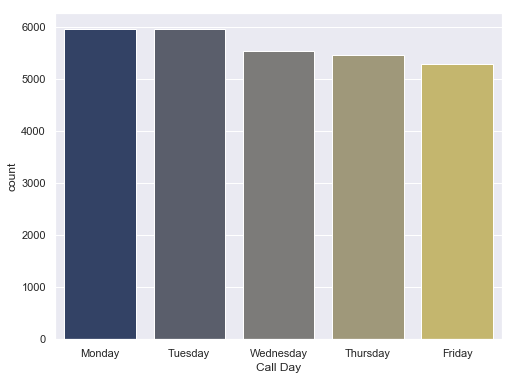

In [77]:
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="Call Day", data=theft_calls_week, 
                   palette='cividis', order = theft_calls_week['Call Day'].value_counts().index)

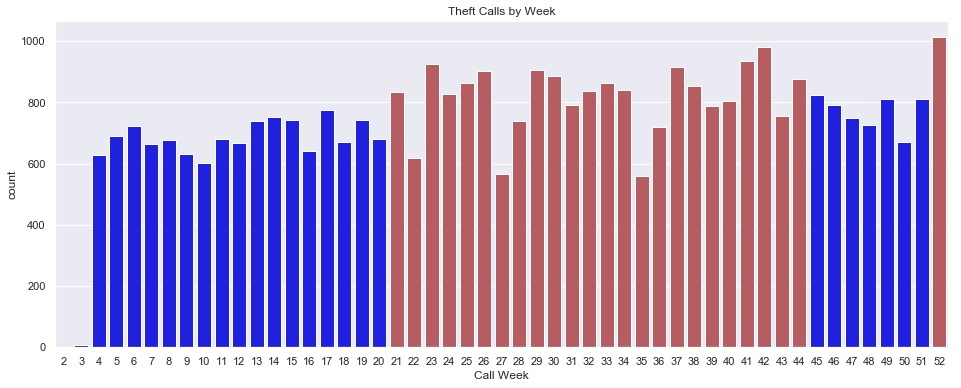

In [213]:
#color bars for months between May 20 and November 3 (Highest call months)
pal = {week: "r" if (((week >= 21) & 
                     (week <= 44)) |
                     (week == 52)) else "blue" for week in df_theft_calls['Call Week'].unique()}

#plotting theft calls by week number
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="Call Week", data=df_theft_calls, 
                   palette=pal).set_title('Theft Calls by Week')

In [89]:
top_week_calls = df_theft_calls[(df_theft_calls['Call Week'] >= 21) & (df_theft_calls['Call Week'] <= 44)]

In [90]:
top_week_calls.shape

(19593, 11)

In [92]:
top_week_calls['Call Week'].value_counts().head(5)

42    980
41    937
23    925
37    917
29    905
Name: Call Week, dtype: int64

In [93]:
top_week_calls['Call Week'].value_counts(normalize=True).head(5)

42    0.050018
41    0.047823
23    0.047211
37    0.046802
29    0.046190
Name: Call Week, dtype: float64

In [138]:
oktober_fest = top_week_calls[(top_week_calls['Call Received'] >= '2019-10-10') &
                             (top_week_calls['Call Received'] <= '2019-10-13')]
oktober_fest.head(10)

In [140]:
oktober_fest.shape

(393, 11)

In [145]:
#heatmap for oktoberfest theft calls
map_heatmap = folium.Map([36.176637, -86.788732], zoom_start=14)

oktober_fest_heat = oktober_fest[['Latitude', 'Longitude']].dropna()
oktober_fest_heat = [[row['Latitude'],row['Longitude']] for index, row in oktober_fest_heat.iterrows()]

HeatMap(oktober_fest_heat, min_opacity=0.6).add_to(map_heatmap)

map_heatmap

In [146]:
vandy_homecoming = top_week_calls[(top_week_calls['Call Received'] >= '2019-10-17') &
                             (top_week_calls['Call Received'] <= '2019-10-20')]
vandy_homecoming.head(10)

Call Received Call Month  Call Week  Call Day Call Time  \
Event Number                                                                   
PD201900890075 2019-10-17 13:02:12        Oct         42  Thursday  13:02:12   
PD201900890076 2019-10-17 13:02:13        Oct         42  Thursday  13:02:13   
PD201900890107 2019-10-17 13:10:58        Oct         42  Thursday  13:10:58   
PD201900888742 2019-10-17 01:17:27        Oct         42  Thursday  01:17:27   
PD201900890154 2019-10-17 13:29:01        Oct         42  Thursday  13:29:01   
PD201900888763 2019-10-17 01:31:21        Oct         42  Thursday  01:31:21   
PD201900890159 2019-10-17 13:31:59        Oct         42  Thursday  13:31:59   
PD201900890164 2019-10-17 13:34:33        Oct         42  Thursday  13:34:33   
PD201900890190 2019-10-17 13:43:38        Oct         42  Thursday  13:43:38   
PD201900890204 2019-10-17 13:48:22        Oct         42  Thursday  13:48:22   

               Call Time of Day Tencode Description Disposition Description  \
Event Number                                                                  
PD201900890075        Afternoon               Theft    DISREGARD / SIGNAL 9   
PD201900890076        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900890107        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900888742       Late Night               Theft   M.P.D. REPORT COMPLED   
PD201900890154        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900888763       Late Night               Theft     ASSISTED OTHER UNIT   
PD201900890159        Afternoon               Theft             NO RESPONSE   
PD201900890164        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900890190        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900890204        Afternoon               Theft     ASSISTED OTHER UNIT   

                  Mapped Location  Latitude  Longitude  
Event Number                                            
PD201900890075  (36.205, -86.692)    36.205    -86.692  
PD201900890076  (36.152, -86.767)    36.152    -86.767  
PD201900890107  (36.144, -86.734)    36.144    -86.734  
PD201900888742  (36.175, -86.789)    36.175    -86.789  
PD201900890154  (36.156, -86.867)    36.156    -86.867  
PD201900888763                NaN       NaN        NaN  
PD201900890159                NaN       NaN        NaN  
PD201900890164  (36.139, -86.798)    36.139    -86.798  
PD201900890190                NaN       NaN        NaN  
PD201900890204                NaN       NaN        NaN

In [147]:
vandy_homecoming.shape

(367, 11)

In [148]:
map_heatmap = folium.Map([36.176637, -86.788732], zoom_start=11)

vandy_homecoming_heat = vandy_homecoming[['Latitude', 'Longitude']].dropna()
vandy_homecoming_heat = [[row['Latitude'],row['Longitude']] for index, row in vandy_homecoming_heat.iterrows()]

HeatMap(vandy_homecoming_heat, min_opacity=0.6).add_to(map_heatmap)

map_heatmap

In [149]:
vandy_homecoming['Call Time of Day'].value_counts(normalize=True)

Morning          0.277929
Afternoon        0.256131
Early Morning    0.196185
Evening          0.136240
Late Night       0.070845
Night            0.062670
Name: Call Time of Day, dtype: float64

In [153]:
vandy_concert = vandy_homecoming[(vandy_homecoming['Call Received'] >= '2019-10-18') &
                                (vandy_homecoming['Call Received'] <= '2019-10-19')]
vandy_concert.head()

Call Received Call Month  Call Week Call Day Call Time  \
Event Number                                                                  
PD201900893088 2019-10-18 13:03:20        Oct         42   Friday  13:03:20   
PD201900893089 2019-10-18 13:03:33        Oct         42   Friday  13:03:33   
PD201900893095 2019-10-18 13:06:58        Oct         42   Friday  13:06:58   
PD201900893100 2019-10-18 13:09:27        Oct         42   Friday  13:09:27   
PD201900893108 2019-10-18 13:12:08        Oct         42   Friday  13:12:08   

               Call Time of Day Tencode Description Disposition Description  \
Event Number                                                                  
PD201900893088        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900893089        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900893095        Afternoon               Theft    DISREGARD / SIGNAL 9   
PD201900893100        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201900893108        Afternoon               Theft   M.P.D. REPORT COMPLED   

                  Mapped Location  Latitude  Longitude  
Event Number                                            
PD201900893088  (36.135, -86.892)    36.135    -86.892  
PD201900893089                NaN       NaN        NaN  
PD201900893095                NaN       NaN        NaN  
PD201900893100  (36.084, -86.582)    36.084    -86.582  
PD201900893108                NaN       NaN        NaN

In [154]:
vandy_concert['Call Time of Day'].value_counts(normalize=True)

Morning          0.29375
Afternoon        0.26250
Early Morning    0.22500
Evening          0.10625
Late Night       0.06250
Night            0.05000
Name: Call Time of Day, dtype: float64

In [155]:
df_theft_calls['Call Week'].value_counts().head(5)

52    1015
42     980
41     937
23     925
37     917
Name: Call Week, dtype: int64

In [159]:
final_week = df_theft_calls[(df_theft_calls['Call Week'] == 52)]
final_week.shape

(1015, 11)

In [162]:
final_week['Call Time of Day'].value_counts(normalize=True)

Morning          0.296552
Afternoon        0.259113
Evening          0.159606
Early Morning    0.135961
Late Night       0.078818
Night            0.069951
Name: Call Time of Day, dtype: float64

In [165]:
final_week['Disposition Description'].value_counts()

M.P.D. REPORT COMPLED            663
DISREGARD / SIGNAL 9              95
ASSISTED OTHER UNIT               90
ASSISTED CITIZEN                  73
GONE ON ARRIVAL                   51
NO RESPONSE                       16
ASSISTANCE REFUSED                12
ARREST, CUSTODIAL OR CITATION      5
CITATION - TRAFFIC                 4
LOCATION/BUILDING SECURE           2
ADVISED IN CIVIL CASE              1
ADVISORY / NOTICE FORM GIVEN       1
COMMUNITY POLICING                 1
FALSE CALL                         1
Name: Disposition Description, dtype: int64

In [169]:
map_heatmap = folium.Map([36.176637, -86.788732], zoom_start=11)

final_week_heat = final_week[['Latitude', 'Longitude']].dropna()
final_week_heat = [[row['Latitude'],row['Longitude']] for index, row in final_week_heat.iterrows()]

HeatMap(final_week_heat, min_opacity=0.5).add_to(map_heatmap)

map_heatmap

In [175]:
christmas = df_theft_calls[(df_theft_calls['Call Received'] >= '2019-12-24') &
                                (df_theft_calls['Call Received'] <= '2019-12-25')]
christmas.shape

(90, 11)

In [180]:
christmas['Call Time of Day'].value_counts(normalize=True)

Morning          0.311111
Afternoon        0.277778
Evening          0.177778
Night            0.122222
Early Morning    0.088889
Late Night       0.022222
Name: Call Time of Day, dtype: float64

In [184]:
pie = (christmas['Call Time of Day'].value_counts(normalize=True)).values

In [186]:
pie

array([0.31111111, 0.27777778, 0.17777778, 0.12222222, 0.08888889,
       0.02222222])

In [187]:
labels = ['Morning','Afternoon','Evening','Night','Early Morning','Late Night']

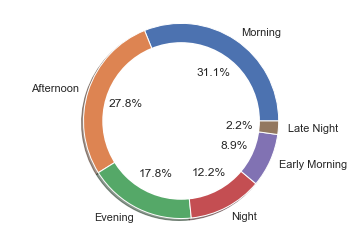

In [199]:
plt.pie(pie, labels=labels,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.8,color='white', fc='white',linewidth=1.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

In [200]:
christmas['Disposition Description'].value_counts()

M.P.D. REPORT COMPLED            53
ASSISTED OTHER UNIT              13
DISREGARD / SIGNAL 9              7
GONE ON ARRIVAL                   6
ASSISTED CITIZEN                  5
NO RESPONSE                       2
ASSISTANCE REFUSED                2
ADVISORY / NOTICE FORM GIVEN      1
ARREST, CUSTODIAL OR CITATION     1
Name: Disposition Description, dtype: int64

In [202]:
map_heatmap = folium.Map([36.176637, -86.788732], zoom_start=11)

christmas_heat = christmas[['Latitude', 'Longitude']].dropna()
christmas_heat = [[row['Latitude'],row['Longitude']] for index, row in christmas_heat.iterrows()]

HeatMap(christmas_heat, min_opacity=0.6).add_to(map_heatmap)

map_heatmap

In [204]:
nye = df_theft_calls[(df_theft_calls['Call Received'] >= '2019-12-31')]
nye.shape

(126, 11)

In [207]:
nye['Call Time of Day'].value_counts(normalize=True)

Morning          0.365079
Afternoon        0.214286
Evening          0.150794
Early Morning    0.142857
Late Night       0.079365
Night            0.047619
Name: Call Time of Day, dtype: float64

In [206]:
nye['Disposition Description'].value_counts()

M.P.D. REPORT COMPLED            83
ASSISTED OTHER UNIT              13
DISREGARD / SIGNAL 9             11
ASSISTED CITIZEN                  9
GONE ON ARRIVAL                   5
ASSISTANCE REFUSED                2
CITATION - TRAFFIC                2
ARREST, CUSTODIAL OR CITATION     1
Name: Disposition Description, dtype: int64

In [208]:
nye.head()

Call Received Call Month  Call Week Call Day Call Time  \
Event Number                                                                  
PD201901091310 2019-12-31 13:21:11        Dec         52  Tuesday  13:21:11   
PD201901091313 2019-12-31 13:21:46        Dec         52  Tuesday  13:21:46   
PD201901091321 2019-12-31 13:23:08        Dec         52  Tuesday  13:23:08   
PD201901091327 2019-12-31 13:26:38        Dec         52  Tuesday  13:26:38   
PD201901091331 2019-12-31 13:30:18        Dec         52  Tuesday  13:30:18   

               Call Time of Day Tencode Description Disposition Description  \
Event Number                                                                  
PD201901091310        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201901091313        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201901091321        Afternoon               Theft   M.P.D. REPORT COMPLED   
PD201901091327        Afternoon               Theft        ASSISTED CITIZEN   
PD201901091331        Afternoon               Theft   M.P.D. REPORT COMPLED   

                  Mapped Location  Latitude  Longitude  
Event Number                                            
PD201901091310  (36.168, -86.778)    36.168    -86.778  
PD201901091313  (36.152, -86.785)    36.152    -86.785  
PD201901091321                NaN       NaN        NaN  
PD201901091327  (36.175, -86.741)    36.175    -86.741  
PD201901091331  (36.317, -86.695)    36.317    -86.695

In [209]:
map_heatmap = folium.Map([36.176637, -86.788732], zoom_start=11)

nye_heat = nye[['Latitude', 'Longitude']].dropna()
nye_heat = [[row['Latitude'],row['Longitude']] for index, row in nye_heat.iterrows()]

HeatMap(nye_heat, min_opacity=0.6).add_to(map_heatmap)

map_heatmap

In [215]:
df_2018 = pd.read_csv("Metro_Nashville_Police_Department_Calls_for_Service__2018_.csv", index_col='Event Number')
df_2018.head()

Call Received  Complaint Number Shift  Tencode  \
Event Number                                                              
PD201800174180  02/16/2018 05:47:00 PM       20180155292     B       44   
PD201800174484  02/16/2018 07:09:00 PM       20180155542     B       93   
PD201800173483  02/16/2018 01:38:00 PM       20180154722     A       45   
PD201800175018  02/16/2018 10:08:00 PM                 0     B       87   
PD201800174650  02/16/2018 08:02:00 PM       20180155684     B       93   

                               Tencode Description Tencode Suffix  \
Event Number                                                        
PD201800174180                   Disorderly Person              P   
PD201800174484                   Traffic Violation            NaN   
PD201800173483  Vehicle Accident - Property Damage              P   
PD201800175018                       Safety Hazard              P   
PD201800174650                   Traffic Violation            NaN   

               Tencode Suffix Description  Disposition Code  \
Event Number                                                  
PD201800174180                   PROGRESS                 6   
PD201800174484                        NaN                 3   
PD201800173483                   PROGRESS                 1   
PD201800175018                   PROGRESS                11   
PD201800174650                        NaN                 9   

               Disposition Description   Block                 Street Name  \
Event Number                                                                 
PD201800174180     ASSISTED OTHER UNIT     NaN             GALLATIN PKE S    
PD201800174484      CITATION - TRAFFIC   600.0                  ALBANY DR    
PD201800173483   M.P.D. REPORT COMPLED     0.0        MCCANN ST & 2ND AV S   
PD201800175018    DISREGARD / SIGNAL 9     0.0  CLARKSVILLE PKE & KINGS LN   
PD201800174650          SUBJECT WARNED  5800.0           OLD HICKORY BLVD    

               Unit Dispatched Sector Zone     RPA  Latitude  Longitude  \
Event Number                                                              
PD201800174180            711B    NaN  NaN     NaN       NaN        NaN   
PD201800174484            521B      H   23  9509.0    36.210    -86.600   
PD201800173483            3T74      S   11  8153.0    36.151    -86.768   
PD201800175018             NaN      N   23  3141.0    36.219    -86.837   
PD201800174650            5F34      H   21  9527.0    36.169    -86.601   

                  Mapped Location  
Event Number                       
PD201800174180                NaN  
PD201800174484     (36.21, -86.6)  
PD201800173483  (36.151, -86.768)  
PD201800175018  (36.219, -86.837)  
PD201800174650  (36.169, -86.601)

In [216]:
df_2018['Tencode Description'].unique()

array(['Disorderly Person', 'Traffic Violation',
       'Vehicle Accident - Property Damage', 'Safety Hazard',
       'Want Officer for Investigation / Assistance',
       'Administrative/Special Assignment', 'Intoxicated Person',
       'Business Check', 'Holdup / Robbery', 'Suicidal Person',
       'Community Policing Activity', 'Burglary - Non-Residence',
       'Burglary - Residence', 'Suspicious Person', 'Person with Weapon',
       'Fight / Assault', 'Person Indecently Exposed',
       'Investigate 911 Hang-Up Call', 'Meal Break', 'Fixed Post',
       'Theft', 'Missing Person', 'Shots Fired',
       'Transport Prisoner / Suspect',
       'Vehicle Accident - Personal Injury', 'Dangerous / Injured Animal',
       'Vehicle Blocking Right of Way', 'Fire', 'Mentally ILL Person',
       'Corpse / D. O. A.', 'Person Screaming', 'Kidnapping', 'Explosion',
       'Shooting', 'Escort / Convoy', 'Personal Relief',
       'Cutting / Stabbing', 'Prowler', 'Hazardous Liquid / Gas Leak',
      

In [218]:
(df_2018['Tencode Description'] == 'Theft').value_counts()

False    719931
True      27392
Name: Tencode Description, dtype: int64

In [219]:
df_theft_calls['Call Time of Day'].value_counts(normalize=True)

Morning          0.272067
Afternoon        0.250007
Evening          0.183110
Early Morning    0.152910
Night            0.073790
Late Night       0.068116
Name: Call Time of Day, dtype: float64